# spin transformations on discrete surfaces
Tim Tyree<br>
12.30.2022

This notebook works along with the paper of the same name by Crane, Pinkall, and Schröder (2011).

In [1]:
from lib.my_initialization import *

In [2]:
plt.plot([4]*3)
plt.close()
#reset matplotlib
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()
#set randomization seed
np.random.seed(42)
#consider darkmode
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    
%load_ext autoreload
%autoreload 2

In [3]:
import scipy.io as sio
from IPython.display import IFrame


In [4]:
import scipy

# define module

In [5]:
def get_colors_trimesh(inp, colormap=None, vmin=None, vmax=None):
    """inp is a 1D numpy array that is mapped to a plt.cm.jet if colormap is None.
    
    Example Usage:
colors = get_colors_trimesh(rho, plt.cm.jet)
mesh = trimesh.Trimesh(vertices=vert,faces=tria,face_colors=colors)
    """
    
    if colormap is None:
        colormap = plt.cm.jet
    # norm = plt.Normalize()
    # colors = plt.cm.jet(norm(rho))
    # colors = plt.cm.jet(np.linspace(0,1,len(dz)))
    norm = plt.Normalize(vmin, vmax)
    colors = colormap(norm(inp))
    return (255*colors/np.max(colors)).astype('uint8')#[:,0,:]


In [89]:
@njit
def jiH(pnt):
    """jiH castes a cartesion point, pnt, to a real quaternionic representation."""
    a=pnt[0]; b=pnt[1]; c=pnt[2]; d=pnt[3];
    h = np.array([
        [a, -b, -c, -d],
        [b,  a, -d,  c],
        [c,  d,  a, -b],
        [d, -c,  b,  a]])
    return h


# load example triangle mesh endowed with scalar curvture field

In [6]:
root_dir = '/'.join(nb_dir.split('/')[:3])
mesh_folder = f"{root_dir}/Documents/MATLAB/spin/res"
os.chdir(mesh_folder)
for fn in sorted(os.listdir()):
    pass
fn

'sphere.mat'

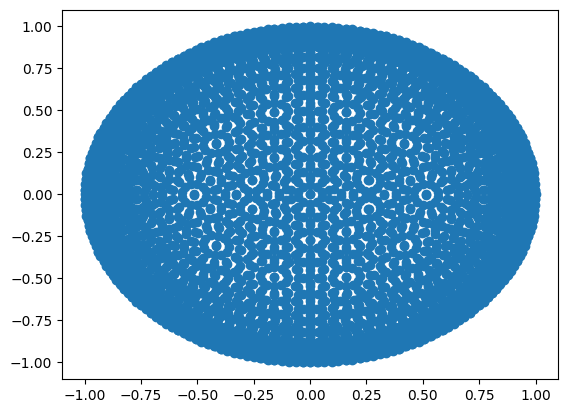

((8000, 3), (8000,), (4002, 3))

In [7]:
#load example mesh with custom curvature field
mat = sio.loadmat(fn)
# tria,vert,rho = mat['model'][0,0]
vert,tria,rho = mat['model'][0,0]
rho = rho.T.flatten()
# vert = vert.T.copy()-1 #correct for matlab's 1 indexing
# tria = tria.T.copy()
tria = tria.T.copy()-1 #correct for matlab's 1 indexing
vert = vert.T.copy()
use_whiten_mesh=False
if use_whiten_mesh:
    #optionally whiten the mesh
    vert -= np.mean(vert,axis=0)
    vert /= np.std(vert,axis=0)
# plt.scatter(x=tria[:,0],y=tria[:,1])
plt.scatter(x=vert[:,0],y=vert[:,2])#,c=rho,cmap='jet')
plt.show()
# vert.shape,tria.shape,rho.shape,np.max(vert)
tria.shape,rho.shape,vert.shape

In [8]:
# if colormap is None:
colormap = plt.cm.jet
norm = plt.Normalize(vmin=None, vmax=None)
colors = colormap(norm(rho))
# (255*colors/np.max(colors)).astype('uint8')[:,0,:]
colors = (255*colors/np.max(colors)).astype('uint8')#[:,0:]

In [9]:
# initialize mesh colored by rho
# colors = get_colors_trimesh(rho, plt.cm.jet)
mesh = trimesh.Trimesh(vertices=vert,faces=tria,
                       face_colors=colors,
                       face_attributes={'rho':rho})

In [10]:
# is the current mesh watertight?
print(f"{mesh.is_watertight=}")
# what's the euler number for the mesh?
print(f"{mesh.euler_number=}")
# the convex hull is another Trimesh object that is available as a property
# lets compare the volume of our mesh with the volume of its convex hull
print(f"{mesh.volume / mesh.convex_hull.volume=:.7f}")
# # since the mesh is watertight, it means there is a
# # volumetric center of mass which we can set as the origin for our mesh
mesh.vertices -= mesh.center_mass
print(f"{mesh.center_mass=}")
# what's the moment of inertia for the mesh?
print(f"{mesh.moment_inertia=}")

# # if there are multiple bodies in the mesh we can split the mesh by
# # connected components of face adjacency
# # since this example mesh is a single watertight body we get a list of one mesh
# mesh.split()

# axis aligned bounding box is available
print(f"{mesh.bounding_box.extents=}")

mesh.is_watertight=True
mesh.euler_number=2
mesh.volume / mesh.convex_hull.volume=1.0000000
mesh.center_mass=array([ 8.84711455e-18, -6.63533591e-18,  9.95300387e-18])
mesh.moment_inertia=array([[ 1.67165441e+00,  1.48029737e-17, -1.11022302e-17],
       [ 1.48029737e-17,  1.67165448e+00,  6.33706986e-08],
       [-1.11022302e-17,  6.33706986e-08,  1.67165430e+00]])
mesh.bounding_box.extents=array([2., 2., 2.])


In [11]:
# # #color vertices manually
# # for i,c in enumerate(vertex_colors):
# #     mesh.visual.vertex_colors[i]=c
# # mesh.visual.vertex_colors
# # #randomize face colors
# for face in mesh.faces:
#     mesh.visual.vertex_colors[face] = colors[face]
# for facet in mesh.facets:
#     mesh.visual.vertex_colors[facet] = trimesh.visual.random_color()
# mesh.show()

In [12]:
# #plot an image on the mesh
# m = mesh
# uv = np.random.rand(m.vertices.shape[0], 2)
# # im = np.random.rand(m.vertices.shape[0], m.vertices.shape[0])
# im = np.random.rand(200,200)
# material = trimesh.visual.texture.SimpleMaterial(image=im)
# color_visuals = trimesh.visual.TextureVisuals(uv=uv, image=im, material=material)
# mesh=trimesh.Trimesh(vertices=m.vertices, faces=m.faces, visual=color_visuals, validate=True, process=False)
# mesh.show()

In [13]:
# # transform method can be passed a (4, 4) matrix and will cleanly apply the transform
# mesh.apply_transform(trimesh.transformations.random_rotation_matrix())

# # a minimum volume oriented bounding box also available
# # primitives are subclasses of Trimesh objects which automatically generate
# # faces and vertices from data stored in the 'primitive' attribute
# print(f"{mesh.bounding_box_oriented.primitive.extents=}")
# print(f"{mesh.bounding_box_oriented.primitive.transform=}")

# # bounding spheres and bounding cylinders of meshes are also
# # available, and will be the minimum volume version of each
# # except in certain degenerate cases, where they will be no worse
# # than a least squares fit version of the primitive.
# print(f"""{mesh.bounding_box_oriented.volume=},
#       {mesh.bounding_cylinder.volume=},
#       {mesh.bounding_sphere.volume=}""")

# # show the mesh appended with its oriented bounding box
# # the bounding box is a trimesh.primitives.Box object, which subclasses
# # Trimesh and lazily evaluates to fill in vertices and faces when requested
# # (press w in viewer to see triangles)
# # (mesh + mesh.bounding_box_oriented).show()
# mesh.show()

In [15]:
#view the mesh
mesh.show()
# scene = trimesh.scene.Scene(mesh)
# trimesh.viewer.notebook.scene_to_notebook(scene=scene, height=200)

# TODO: dev implementation using numpy-quaternion package
- it is difficult to do this with numpy-quaternion?
- Q: does quaternionic package handle matrix inverses?

In [169]:
import quaternionic

In [170]:
import quaternion

In [171]:
# function V=spin(T,V,rho)
# % input: T (3xN) and V (3xM) so that
# %  trimesh(T',V(1,:),V(2,:),V(3,:)) plots the triangular mesh,
# %  rho (1xN) values of conformal scaling
# % output: V (3xM) vertices of transformed mesh
#input: T,V,rho

T = tria
V = vert
#input: T,V,rho
#output: V or V_out,ome_out

nT=T.shape[0]
nV=V.shape[0]
# plc=list(range(-3,1))
# plc=np.array(list(range(-3,1)))
#initialize virtual memory
# E = scipy.sparse.csc_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.csr_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.bsr_matrix((4*nV,4*nV), dtype=V.dtype)
# E = np.zeros((4*nV,4*nV), dtype=V.dtype)
#Q: which is faster? csr or bsr or csc?
# E = np.zeros((nV,nV), dtype=V.dtype)
# E = np.zeros((nV,nV,4), dtype=np.quaternion)
E = np.zeros((nV,nV), dtype=np.quaternion)

edg=np.zeros(shape=(3,4))
# pnty = np.zeros(4)
pntz = np.zeros(4)
# ini=np.zeros(shape=(3,4),dtype='int64')
# ini=np.zeros(shape=(4,3),dtype='int64')
edgy=np.zeros(shape=(3,4),dtype=V.dtype)
E.dtype,edg.dtype,pnty,pntz,edgy.shape,edgy.dtype

(dtype(quaternion),
 dtype('float64'),
 array([2.57610703e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0., 0., 0., 0.]),
 (3, 4),
 dtype('<f8'))

In [173]:
for c1 in range(nT):
    tri = T[c1]
    pnt=V[tri]
    #compute triangle area
    A = 0.5*np.linalg.norm(np.cross(pnt[1]-pnt[0], pnt[2]-pnt[0]))
    a = -0.25/A  # a=-1/(4*A)
    #compute target curvature component
    r = rho[c1]
    b = r/6. #  b=rho(c1)/6;
    # pnty[0]=A*r**2/9.
    # c = jiH(pnty) #c=jiH([A*rho(c1)*rho(c1)/9 0 0 0]);
    # c = np.quaternion(pnty)
    c = np.quaternion(A*r**2/9.)
    for c2 in range(3):
        #Q: is this value right?
        # V[tri[(c2+1)%3+1]] - V[tri[(c2+0)%3+1]]
        pntz[1:] = V[tri[(c2+1)%3]] - V[tri[(c2+0)%3]]
        edg[c2]  = pntz.copy()
        # edg[c2]  = [0;V(:, tri(mod(c2+1,3)+1) )-V(:, tri(mod(c2+0,3)+1) )]
    wooo = np.array([[
        np.quaternion(*(a*jiH(edg[0])@edg[0]))+c, 
        np.quaternion(*(a*jiH(edg[0])@edg[1]  + b*(edg[1]-edg[0])))+c, 
        np.quaternion(*(a*jiH(edg[0])@edg[2]  + b*(edg[2]-edg[0])))+c], [
        np.quaternion(*(a*jiH(edg[1])@edg[0]  + b*(edg[0]-edg[1])))+c, 
        np.quaternion(*(a*jiH(edg[1])@edg[1]))+c,
        np.quaternion(*(a*jiH(edg[1])@edg[2]  + b*(edg[2]-edg[1])))+c], [
        np.quaternion(*(a*jiH(edg[2])@edg[0]  + b*(edg[0]-edg[2])))+c, 
        np.quaternion(*(a*jiH(edg[2])@edg[1]  + b*(edg[1]-edg[2])))+c, 
        np.quaternion(*(a*jiH(edg[2])@edg[2]))+c
    ]])
    E[np.ix_(tri,tri)] = E[np.ix_(tri,tri)] + wooo

In [174]:
# q^{-1}=q'/(q*q')


In [176]:
(E.T*E)

array([[quaternion(27.6556425846966, -3.64906940825802e-17, 5.83851105321283e-16, 0),
        quaternion(1.11043838048315, -3.46944695195361e-18, -2.16840434497101e-19, 0),
        quaternion(1.11051711686198, -1.38845640713925e-17, 4.33680868994202e-19, 1.38777878078145e-17),
        ..., quaternion(0, 0, 0, 0), quaternion(0, 0, 0, 0),
        quaternion(0, 0, 0, 0)],
       [quaternion(1.11043838048315, -3.46944695195361e-18, 2.16840434497101e-19, 0),
        quaternion(50.5575368485085, -2.46690942946589e-17, -7.89411017429085e-16, -1.47918202118365e-16),
        quaternion(2.10507890922448, -4.59091857411831e-19, -7.96888596776846e-17, 1.73472347597681e-18),
        ..., quaternion(0, 0, 0, 0), quaternion(0, 0, 0, 0),
        quaternion(0, 0, 0, 0)],
       [quaternion(1.11051711686198, -1.38710115442364e-17, -4.33680868994202e-19, 1.38777878078145e-17),
        quaternion(2.10507890922448, 4.59091857411831e-19, -7.96888596776846e-17, -5.20417042793042e-18),
        quaternion(50.5

In [177]:
# quaternion.quaternion.

In [178]:
# quaternion.quaternion_time_series.
# quaternion.means?

In [188]:
# quaternion.quaternion.inverse(E)
(quaternion.as_spinor_array(np.quaternion(1,0,0,0)),
    quaternion.as_spinor_array(np.quaternion(0,1,0,0)),
    quaternion.as_spinor_array(np.quaternion(0,0,1,0)),
    quaternion.as_spinor_array(np.quaternion(0,0,0,1)))

(array([[1.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+1.j]]),
 array([[0.+0.j, 1.+0.j]]),
 array([[0.+1.j, 0.+0.j]]))

In [193]:
#TODO: map float array to nV*2xnV*2 complex array and take the eigen decomposition.
#heretim
quaternion.as_float_array(E)

array([[[ 5.25886324e+00, -3.46944695e-18,  5.55111512e-17,
          0.00000000e+00],
        [-1.05140861e+00,  1.32253046e-02, -9.50394423e-04,
          6.93000586e-02],
        [-1.05139718e+00, -6.22337389e-02, -9.61133156e-04,
          3.47437708e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00]],

       [[-1.05140861e+00, -1.32253046e-02,  9.50394423e-04,
         -6.93000586e-02],
        [ 7.11038233e+00, -1.73472348e-18, -5.55111512e-17,
         -1.04015646e-17],
        [-1.44974027e+00, -5.71006523e-02,  1.80892214e-03,
         -8.26427331e-03],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.000

ValueError: No cast function available.

In [190]:
E.astype(np.complex64)

ValueError: No cast function available.

In [162]:
quaternion.as_spinor_array(E).shape

(4002, 4002, 2)

In [161]:
np.linalg.inv(quaternion.as_spinor_array(E))

LinAlgError: Last 2 dimensions of the array must be square

In [105]:
(E/E).shape

/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_40026/21727327.py:1: RuntimeWarning: invalid value encountered in true_divide
  (E/E).shape


(4002, 4002)

In [139]:

#Q: does this work as a fast matrix inverse?
q_identity = E/E
boon=np.isnan(q_identity)
q_identity[boon]=0*E[boon]
q_identity[0][:3]

/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_40026/1742309622.py:2: RuntimeWarning: invalid value encountered in true_divide
  q_identity = E/E


array([quaternion(1, 0, 0, 0), quaternion(1, 0, 0, 0),
       quaternion(1, 0, 0, 0)], dtype=quaternion)

In [138]:
# # boo_nan = np.isnan(q_identity[0][3:])
# boo_nan = np.isnan(q_identity[100])
# np.argwhere(boo_nan).all()

In [153]:
lam=np.zeros(nV,dtype=np.quaternion)+1
# lam=zeros(4*nV,1);
# lam(1:4:end)=1;  
lam.shape

(4002,)

In [154]:
for c1 in range(11):
    pass

cnv=lam
lam=lam/E
lam.shape

/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_40026/2038405047.py:5: RuntimeWarning: invalid value encountered in true_divide
  lam=lam/E


(4002, 4002)

In [152]:
boon=np.isnan(lam)
boon.shape

(4002, 4002)

In [ ]:
q_identity[boon]=0*E[boon]

In [ ]:

lam=lam/np.norm(lam)

In [ ]:
for c1=1:11
  cnv=lam;
  lam=E\lam;
  lam=lam/norm(lam);
end

In [ ]:


res=(E*lam)./lam;  
fprintf('mean %e, var %e, delta %e\n',mean(res),var(res),norm(cnv-lam))


In [ ]:

L  =sparse(4*nV,4*nV);
ome=zeros(4*nV,1);
for c1=1:nT
  for c2=1:3
    k0=T(mod(c2-1,3)+1,c1);
    k1=T(mod(c2+0,3)+1,c1);
    k2=T(mod(c2+1,3)+1,c1);
    u1=V(:,k1)-V(:,k0);
    u2=V(:,k2)-V(:,k0);
    cta=dot(u1,u2) / norm( cross(u1,u2) );
    h=jiH([cta*0.5 0 0 0]);
    ini=[k1*4+plc  k2*4+plc];
    L(ini,ini)=L(ini,ini)+[ h -h;-h h];
    if k1>k2
      k3=k1; k1=k2; k2=k3; % swap
    end
    lm1=jiH(lam(k1*4+plc));
    lm2=jiH(lam(k2*4+plc));
    edv=jiH([0;V(:,k2)-V(:,k1)]);
    til=lm1'*edv*lm1/3 + lm1'*edv*lm2/6 + lm2'*edv*lm1/6 + lm2'*edv*lm2/3;
    ome(k1*4+plc,1)=ome(k1*4+plc,1)-cta*til(:,1)/2;
    ome(k2*4+plc,1)=ome(k2*4+plc,1)+cta*til(:,1)/2;
  end
  if ~mod(c1,500); fprintf('.'); end
end
fprintf('\n')

ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
ome=reshape(ome,[4*nV 1]);
ome=L\ome;
ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
nrm=sum(ome.*ome,1);
ome=ome/sqrt(max(nrm));
V=ome(2:end,:);


# DONT: attempt dev basic example from the matlab demo implementation using the real representation of quaternions
- it took 1.5 minutes to invert E in the real representation

In [51]:
# import numpy-quaternion
# !conda install -c conda-forge quaternion

In [40]:
# function h=jiH(pnt)
# a=pnt(1); b=pnt(2); c=pnt(3); d=pnt(4);
# h=[ a -b -c -d
#     b  a -d  c
#     c  d  a -b
#     d -c  b  a];

# @np.vectorize
@njit
def jiH(pnt):
    """jiH castes a cartesion point, pnt, to a real quaternionic representation."""
    a=pnt[0]; b=pnt[1]; c=pnt[2]; d=pnt[3];
    h = np.array([
        [a, -b, -c, -d],
        [b,  a, -d,  c],
        [c,  d,  a, -b],
        [d, -c,  b,  a]])
    return h

# @njit
# def jiH_vectorized(pnt_array):
#     """jiH_vectorized complexifies an array of quaterions.
    
#     Example Usage:
# jiH_vectorized(a*jiH(edg[0]*edg[0]))
#     """
#     #h = np.array([jiH(x) for x in pnt_array]) #numba does not support this it seems...
#     num = pnt_array.shape[0]
#     h=np.empty(shape=(num,4,4))
#     for i in range(num):
#         h[i]=jiH(pnt_array[i])
#     return h
    

In [41]:
#test jiH runs reasonably fast
arr = np.reshape([0,1,2,3]*300,(300,4))
a_lst=[]
for pnt in arr:
    a = jiH(pnt)
    a_lst.append(a)
#test jiH_vectorized runs reasonably fast
# jiH_vectorized(np.concatenate(a_lst)).shape

In [42]:
# @njit
# def reduce_edges(a,eda,edb):
#     #out = jiH_vectorized(a*jiH(eda*edb)) # == some kind of conjugate of jiH(a*jiH(edg[0]*edg[0]))
#     out = jiH_vectorized(a*jiH(eda*edb).T) # == jiH(a*jiH(edg[0]*edg[0]))
#     # jiH(a*jiH(edg(:,1))*edg(:,1))
#     return out

In [43]:
tria.shape,vert.shape,rho.shape

((8000, 3), (4002, 3), (8000,))

In [47]:
# function V=spin(T,V,rho)
# % input: T (3xN) and V (3xM) so that
# %  trimesh(T',V(1,:),V(2,:),V(3,:)) plots the triangular mesh,
# %  rho (1xN) values of conformal scaling
# % output: V (3xM) vertices of transformed mesh
#input: T,V,rho

T = tria
V = vert
#input: T,V,rho
#output: V or V_out,ome_out

nT=T.shape[0]
nV=V.shape[0]
# plc=list(range(-3,1))
plc=np.array(list(range(-3,1)))
#initialize virtual memory
# E = scipy.sparse.csc_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.csr_matrix((4*nV,4*nV), dtype=V.dtype)
# E = scipy.sparse.bsr_matrix((4*nV,4*nV), dtype=V.dtype)
E = np.zeros((4*nV,4*nV), dtype=V.dtype)
#Q: which is faster? csr or bsr or csc?

edg=np.zeros(shape=(3,4))
pnty = np.zeros(4)
pntz = np.zeros(4)
ini=np.zeros(shape=(3,4),dtype='int64')
# ini=np.zeros(shape=(4,3),dtype='int64')
edgy=np.zeros(shape=(3,4),dtype=V.dtype)
E.dtype,edg.dtype,pnty,pntz,edgy.shape,edgy.dtype

for c1 in range(nT):
    tri = T[c1]
    pnt=V[tri]
    #compute triangle area
    A = 0.5*np.linalg.norm(np.cross(pnt[1]-pnt[0], pnt[2]-pnt[0]))
    a = -0.25/A  # a=-1/(4*A)
    #compute target curvature component
    r = rho[c1]
    b = r/6. #  b=rho(c1)/6;
    pnty[0]=A*r**2/9.
    c = jiH(pnty) #c=jiH([A*rho(c1)*rho(c1)/9 0 0 0]);

    for c2 in range(3):
        #Q: is this value right?
        # V[tri[(c2+1)%3+1]] - V[tri[(c2+0)%3+1]]
        pntz[1:] = V[tri[(c2+1)%3]] - V[tri[(c2+0)%3]]
        edg[c2]  = pntz.copy()
        # edg[c2]  = [0;V(:, tri(mod(c2+1,3)+1) )-V(:, tri(mod(c2+0,3)+1) )]

    # signature of ini: 0ijk of triangle vertex 1,2,3
    # pseudo-signature of ini: vertex index as axis 0 & quaternion index as axis 1
    # signature of wooo: vertex index as axis 0,1 & quaternion index as axis 2,3
    #result: in matlab, 
    # E(ini,ini) indexes from the 0ijk fields of each triangle vertex 
    # to the 0ijk fields of each triangle vertex of that same triangle.

    ini[0] = tri[0]*4+plc
    ini[1] = tri[1]*4+plc
    ini[2] = tri[2]*4+plc 
    # ini=np.array([tri[0]*4+plc, tri[1]*4+plc, tri[2]*4+plc])
    # ini=[tri(1)*4+plc tri(2)*4+plc tri(3)*4+plc];

    # wo1 = np.array((jiH(a*jiH(edg[0])@edg[0])+c, 
    #     jiH(a*jiH(edg[0])@edg[1]  + b*(edg[1]-edg[0]))+c, 
    #     jiH(a*jiH(edg[0])@edg[2]  + b*(edg[2]-edg[0]))+c))
    # wo1.shape #(3, 4, 4)
    # wo2 = np.array((jiH(a*jiH(edg[1])@edg[0]  + b*(edg[0]-edg[1]))+c, 
    #     jiH(a*jiH(edg[1])@edg[1])+c,
    #     jiH(a*jiH(edg[1])@edg[2]  + b*(edg[2]-edg[1]))+c))
    # wo2.shape #(3, 4, 4)
    # wo3 = np.array((jiH(a*jiH(edg[2])@edg[0]  + b*(edg[0]-edg[2]))+c, 
    #     jiH(a*jiH(edg[2])@edg[1]  + b*(edg[1]-edg[2]))+c, 
    #     jiH(a*jiH(edg[2])@edg[2])+c))
    # wo3.shape #(3, 4, 4)

    # Q: does casting E to a sparse bsc matrix speed up any expensive linear algebra operations?
    wooo = np.array([[
        jiH(a*jiH(edg[0])@edg[0])+c, 
        jiH(a*jiH(edg[0])@edg[1]  + b*(edg[1]-edg[0]))+c, 
        jiH(a*jiH(edg[0])@edg[2]  + b*(edg[2]-edg[0]))+c], 
        [jiH(a*jiH(edg[1])@edg[0]  + b*(edg[0]-edg[1]))+c, 
        jiH(a*jiH(edg[1])@edg[1])+c,
        jiH(a*jiH(edg[1])@edg[2]  + b*(edg[2]-edg[1]))+c], 
        [jiH(a*jiH(edg[2])@edg[0]  + b*(edg[0]-edg[2]))+c, 
        jiH(a*jiH(edg[2])@edg[1]  + b*(edg[1]-edg[2]))+c, 
        jiH(a*jiH(edg[2])@edg[2])+c] 
    ])
    woooo = wooo.reshape((12, 12))
    inii=ini.flatten()
    E[np.ix_(inii, inii)] += woooo
# #     woooo = wooo.reshape((12, 12)).T
#     woooo = wooo.T.reshape((12, 12))
#     # ini.shape,wooo.shape,E[:,ini][ini].shape
#     # ((3, 4), (3, 3, 4, 4), (3, 4, 3, 4))
#     #E[:,ini][ini] += wooo.reshape((3, 4, 3, 4))
#     ##NOTE: ^this doesn't  actually write to target matrix    
#     # EE = E[:,inii]
#     # for n,i in enumerate(inii):
#     #     EE[i]+=woooo[n]
#     ##NOTE: ^this doesn't  actually write to target matrix
#     for n,i in enumerate(inii):
#         E[inii,i]+=woooo[n]
# #         E[i,inii]+=woooo[n]

In [48]:
#NOTE: it took 1.5 minutes to invert E in the real representation
Einv = np.linalg.inv(E)
Einv

array([[-21.38949822,  -9.92141564,  -1.33351421, ...,  -5.33705572,
         -3.69762338, -10.14165566],
       [ -7.28298889,  -2.35117048,  -1.70409482, ...,  -0.83466357,
         -3.04871684,  -2.16488956],
       [ 38.95255571,   6.89879028,   8.2439527 , ...,  -3.27287874,
         14.26177779,  18.88401643],
       ...,
       [ 18.33709642,   7.65244706,   1.61829769, ...,   3.83105752,
          3.71186059,   8.81352793],
       [-72.15233286, -38.89274699,  -6.01769746, ..., -24.39296532,
        -14.22766194, -30.57461501],
       [-32.57063399,  -9.80566777,  -3.31777801, ...,  -2.57543494,
         -7.75425908, -17.99540538]])

In [ ]:
np.isnan(Einv).any(),np.isinf(Einv).any()

In [905]:
np.isnan(Einv)

NameError: name 'Einv' is not defined

In [896]:
    
    #TODO(failing ^this): reimplement using numpy-quaternion.
    #con: it's hard to implement quaternions in low-level cuda...


In [897]:
# EE.shape

In [898]:
# arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

# print(arr[0:2, 1:4])

In [899]:
lam=np.zeros(4*nV)
# lam[1::4]=1.
# lam[-1::4]=1.
lam[::4]=1.
#Q: is ^this right?
## lam(1:4:end)=1;  
lam.shape

(16008,)

In [900]:
lam/E

/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_34796/62964557.py:1: RuntimeWarning: divide by zero encountered in true_divide
  lam/E
/var/folders/0h/p4cbb7yx22jbxm0qb47vhfbh0000gn/T/ipykernel_34796/62964557.py:1: RuntimeWarning: invalid value encountered in true_divide
  lam/E


array([[inf, nan, nan, ..., nan, nan, nan],
       [inf, nan, nan, ..., nan, nan, nan],
       [inf, nan, nan, ..., nan, nan, nan],
       ...,
       [inf, nan, nan, ..., nan, nan, nan],
       [inf, nan, nan, ..., nan, nan, nan],
       [inf, nan, nan, ..., nan, nan, nan]])

In [901]:
n

11

# TODO(failing ^this): determine fastest way to invert a 10000x10000 matrix of quaternions on 1 cpu

In [59]:
import quaternion

In [60]:
import quaternionic

In [61]:
a.shape

(4, 4)

In [81]:
a = np.random.rand(10000, 10000,4)
qs = np.quaternion(a)
qs

TypeError: quaternion constructor takes zero, one, three, or four float arguments, or a single quaternion

In [82]:
qs = a.astype(dtype=np.quaternion)

array([[[quaternion(0.557221408899062, 0, 0, 0),
         quaternion(0.700696630929215, 0, 0, 0),
         quaternion(0.663389565103896, 0, 0, 0),
         quaternion(0.131725009045637, 0, 0, 0)],
        [quaternion(0.507642075238698, 0, 0, 0),
         quaternion(0.883307353976627, 0, 0, 0),
         quaternion(0.394755613622039, 0, 0, 0),
         quaternion(0.526504589488239, 0, 0, 0)],
        [quaternion(0.554260560896585, 0, 0, 0),
         quaternion(0.509362873766475, 0, 0, 0),
         quaternion(0.485245668320959, 0, 0, 0),
         quaternion(0.531909303894235, 0, 0, 0)],
        ...,
        [quaternion(0.465950752885975, 0, 0, 0),
         quaternion(0.368307309789414, 0, 0, 0),
         quaternion(0.541529034822654, 0, 0, 0),
         quaternion(0.917458721698304, 0, 0, 0)],
        [quaternion(0.206568655634714, 0, 0, 0),
         quaternion(0.812011769743873, 0, 0, 0),
         quaternion(0.773508030099856, 0, 0, 0),
         quaternion(0.0171976069820541, 0, 0, 0)],
 

In [83]:
a = np.random.rand(10000, 10000*4)
# a
# array([[ 0.93138726,  0.46972279,  0.18706385,  0.86605021],
#        [ 0.70633523,  0.69982741,  0.93303559,  0.61440879],
#        [ 0.79334456,  0.65912598,  0.0711557 ,  0.46622885],
#        [ 0.88185987,  0.9391296 ,  0.73670503,  0.27115149],
#        [ 0.49176628,  0.56688076,  0.13216632,  0.33309146],
#        [ 0.11951624,  0.86804078,  0.77968826,  0.37229404],
#        [ 0.33187593,  0.53391165,  0.8577846 ,  0.18336855]])
qs = quaternion.as_quat_array(a)
# array([ quaternion(0.931387262880247, 0.469722787598354, 0.187063852060487, 0.866050210100621),
#        quaternion(0.706335233363319, 0.69982740767353, 0.933035590130247, 0.614408786768725),
#        quaternion(0.793344561317281, 0.659125976566815, 0.0711557025000925, 0.466228847713644),
#        quaternion(0.881859869074069, 0.939129602918467, 0.736705031709562, 0.271151494174001),
#        quaternion(0.491766284854505, 0.566880763189927, 0.132166320200012, 0.333091463422536),
#        quaternion(0.119516238634238, 0.86804077992676, 0.779688263524229, 0.372294043850009),
#        quaternion(0.331875925159073, 0.533911652483908, 0.857784598617977, 0.183368547490701)], dtype=quaternion)
# qsi

In [85]:
qsi = np.linalg.inv(qs)
qsi.shape

TypeError: No loop matching the specified signature and casting was found for ufunc inv

In [66]:
# note: quaternion inverted a 10,000x10,000 matrix of quaternions in 3.5 seconds
# note: quaternion crashes the kernel with 100,000x100,000 matrix
qsi = 1/qs

In [67]:
del qsi,qs,a

In [69]:
a = np.random.rand(10000, 10000,4)
# a = np.random.normal(size=(17, 11, 4))  # Just some random numbers; last dimension is 4
q1 = quaternionic.array(a)  # Reinterpret an existing array
# q2 = quaternionic.array([1.2, 2.3, 3.4, 4.5])  # Create a new array

In [72]:
# # note: quaternionic inverted a 10,000x10,000 matrix of quaternions in 7 seconds
# 1/q1
del q1

In [79]:
a = np.random.rand(10000*2, 10000*2)

In [78]:
# # # note: numpy inverted a 20,000x20,000 matrix of real numbers in more than several minutes...
# np.linalg.inv(a)

KeyboardInterrupt: 

In [76]:
#note: quaternion package crashed the kernel.  does quaternionic crash the kernel?

NameError: name 'qsi' is not defined

In [821]:
np.max(E)

0.0

In [ ]:

for c1=1:11
  cnv=lam;
  lam=E\lam;
  lam=lam/norm(lam);
end

In [ ]:

res=(E*lam)./lam;  
fprintf('mean %e, var %e, delta %e\n',mean(res),var(res),norm(cnv-lam))

L  =sparse(4*nV,4*nV);
ome=zeros(4*nV,1);
for c1=1:nT
  for c2=1:3
    k0=T(mod(c2-1,3)+1,c1);
    k1=T(mod(c2+0,3)+1,c1);
    k2=T(mod(c2+1,3)+1,c1);
    u1=V(:,k1)-V(:,k0);
    u2=V(:,k2)-V(:,k0);
    cta=dot(u1,u2) / norm( cross(u1,u2) );
    h=jiH([cta*0.5 0 0 0]);
    ini=[k1*4+plc  k2*4+plc];
    L(ini,ini)=L(ini,ini)+[ h -h;-h h];
    if k1>k2
      k3=k1; k1=k2; k2=k3; % swap
    end
    lm1=jiH(lam(k1*4+plc));
    lm2=jiH(lam(k2*4+plc));
    edv=jiH([0;V(:,k2)-V(:,k1)]);
    til=lm1'*edv*lm1/3 + lm1'*edv*lm2/6 + lm2'*edv*lm1/6 + lm2'*edv*lm2/3;
    ome(k1*4+plc,1)=ome(k1*4+plc,1)-cta*til(:,1)/2;
    ome(k2*4+plc,1)=ome(k2*4+plc,1)+cta*til(:,1)/2;
  end
  if ~mod(c1,500); fprintf('.'); end
end
fprintf('\n')

ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
ome=reshape(ome,[4*nV 1]);
ome=L\ome;
ome=reshape(ome,[4 nV]);
ome=ome-repmat(mean(ome,2),[1 nV]);
nrm=sum(ome.*ome,1);
ome=ome/sqrt(max(nrm));
V=ome(2:end,:);